In [1]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier





In [5]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('C:\\Users\\pc\\Desktop\\.ipynb_checkpoints\\wine.csv')

In [10]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Medium,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Medium,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Medium,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5


In [11]:
df.shape

(1599, 13)

In [12]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Alcohol_content', 'quality'],
      dtype='object')

In [13]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Alcohol_content         0
quality                 0
dtype: int64

In [14]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# as we have categorical column so we do convert ordinal encoder

In [15]:
from sklearn.preprocessing import OrdinalEncoder

In [16]:
ordina_encod = OrdinalEncoder(categories=[['Low','Medium','High']])

In [17]:
df1 = ordina_encod.fit_transform(df[['Alcohol_content']])

In [18]:
df1

array([[0.],
       [1.],
       [1.],
       ...,
       [2.],
       [1.],
       [2.]])

# override alcohal content column with code

In [19]:
df[['Alcohol_content']] = df1

In [20]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1.0,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1.0,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1.0,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0.0,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0.0,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1.0,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,1.0,5


# plotting heatmap (corelation matrix)

In [21]:
#let try to we can reduce features using deffrent techenique
#lets plot heatmap visulize find the cofiecent of multicolinearity

In [22]:
data_corr = df.corr().abs()

In [26]:
plt.figure(figsize=(30,25))

<Figure size 2160x1800 with 0 Axes>

<Figure size 2160x1800 with 0 Axes>

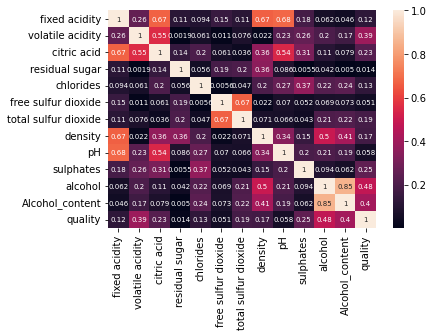

In [34]:
sns.heatmap(data_corr,annot=True,annot_kws={'size':7})
plt.show()

In [35]:
#this code will get coeficent of one variable and other all variable (relationship)

# make sure they are really correlated(it should some follow trend)

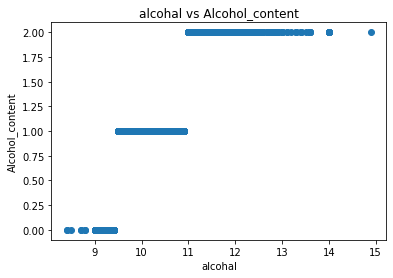

In [36]:
plt.scatter(df.alcohol,df.Alcohol_content)
plt.xlabel('alcohal')
plt.ylabel('Alcohol_content')
plt.title('alcohal vs Alcohol_content')
plt.show()

In [37]:
#we see the claer trend
#as when alcohal is increses its content will increses
#so we can delete one of them

In [41]:
x = df.drop(columns=['quality','Alcohol_content'])
y = df['quality']

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=41)


In [47]:
#lets visulize the data without any preproceesing

In [48]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [49]:
feature_name = list(x.columns)
class_name = list(y_train.unique())
feature_name

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [71]:
!pip install ipython 


In [72]:
!pip install graphviz

In [73]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn import tree






In [74]:
import graphviz

In [78]:
from Ipython.display import image

ModuleNotFoundError: No module named 'Ipython'

In [76]:
import pydotplus

ModuleNotFoundError: No module named 'pydotplus'